In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import texthero as hero

%matplotlib inline

pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('browser_rankings_data.csv')

In [3]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


We can drop the columns 'Date','ID','Country','Language' and 'Date of Last Description Change'

In [5]:
df = df[['Keyword', 'Rank', 'Short Description', 'Long Description', 'App ID']]

In [6]:
df.isnull().sum()

Keyword               0
Rank                 16
Short Description     0
Long Description      0
App ID                0
dtype: int64

In [7]:
print(df.shape)
df = df.dropna(axis = 0)
df.shape

(3066, 5)


(3050, 5)

In [8]:
#df[df['Keyword']=='browser'].sort_values(by = 'Rank').drop_duplicates()

c:\users\saumi\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


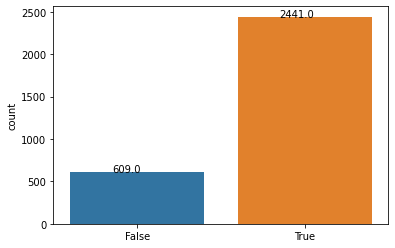

In [9]:
dup = sns.countplot(df.duplicated())
for p in dup.patches:
    dup.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

A large number of records seem to be duplicate, hence we can remove those

In [10]:
df.drop_duplicates(keep = 'first',inplace = True)

In [11]:
df[df['Keyword'] == 'browser'][['App ID','Rank','Keyword','Long Description']].groupby(by = ['App ID','Rank']).apply(lambda a: a[:])

App ID  Rank  Keyword  \
App ID                 Rank                                               
com.android.chrome     1.0  467       com.android.chrome   1.0  browser   
                       2.0  408       com.android.chrome   2.0  browser   
                       3.0  1         com.android.chrome   3.0  browser   
                       4.0  23        com.android.chrome   4.0  browser   
                       5.0  880       com.android.chrome   5.0  browser   
                       6.0  121       com.android.chrome   6.0  browser   
                       7.0  925       com.android.chrome   7.0  browser   
                       8.0  32        com.android.chrome   8.0  browser   
                       10.0 344       com.android.chrome  10.0  browser   
                       11.0 310       com.android.chrome  11.0  browser   
                       12.0 1290      com.android.chrome  12.0  browser   
                       13.0 838       com.android.chrome  13.0  browser   
                       14.0 959       com.android.chrome  14.0  browser   
                       15.0 242       com.android.chrome  15.0  browser   
                       16.0 2477      com.android.chrome  16.0  browser   
                       17.0 1370      com.android.chrome  17.0  browser   
                       20.0 1865      com.android.chrome  20.0  browser   
com.cloudmosa.puffinTV 1.0  4     com.cloudmosa.puffinTV   1.0  browser   
                            5     com.cloudmosa.puffinTV   1.0  browser   
                            6     com.cloudmosa.puffinTV   1.0  browser   
                            7     com.cloudmosa.puffinTV   1.0  browser   
                       2.0  33    com.cloudmosa.puffinTV   2.0  browser   
                            34    com.cloudmosa.puffinTV   2.0  browser   
                            35    com.cloudmosa.puffinTV   2.0  browser   
                            36    com.cloudmosa.puffinTV   2.0  browser   
                       3.0  19    com.cloudmosa.puffinTV   3.0  browser   
                            20    com.cloudmosa.puffinTV   3.0  browser   
                            21    com.cloudmosa.puffinTV   3.0  browser   
                            22    com.cloudmosa.puffinTV   3.0  browser   
                       4.0  511   com.cloudmosa.puffinTV   4.0  browser   
                            512   com.cloudmosa.puffinTV   4.0  browser   
                            513   com.cloudmosa.puffinTV   4.0  browser   
                            514   com.cloudmosa.puffinTV   4.0  browser   
                       5.0  401   com.cloudmosa.puffinTV   5.0  browser   
                            402   com.cloudmosa.puffinTV   5.0  browser   
                            403   com.cloudmosa.puffinTV   5.0  browser   
                            404   com.cloudmosa.puffinTV   5.0  browser   
                       6.0  1902  com.cloudmosa.puffinTV   6.0  browser   
                            1903  com.cloudmosa.puffinTV   6.0  browser   
                            1904  com.cloudmosa.puffinTV   6.0  browser   
                            1905  com.cloudmosa.puffinTV   6.0  browser   
                       7.0  1945  com.cloudmosa.puffinTV   7.0  browser   
                            1946  com.cloudmosa.puffinTV   7.0  browser   
                            1947  com.cloudmosa.puffinTV   7.0  browser   
                            1948  com.cloudmosa.puffinTV   7.0  browser   
                       10.0 2681  com.cloudmosa.puffinTV  10.0  browser   
                            2682  com.cloudmosa.puffinTV  10.0  browser   
                            2683  com.cloudmosa.puffinTV  10.0  browser   
                            2684  com.cloudmosa.puffinTV  10.0  browser   
                       14.0 73    com.cloudmosa.puffinTV  14.0  browser   
                            74    com.cloudmosa.puffinTV  14.0  browser   
                            75    com.cloudmosa.puffinTV  14.0  browser   


It looks like the dataset is scraped from multiple sources since there are multiple browsers with similar ranks, while also the same browser is ranked differently.

In [12]:
df.sort_values(by = ['Keyword','Rank'])

,Keyword,Rank,Short Description,Long Description,App ID
151,ad free browser,2.0,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B...",com.brave.browser
68,ad free browser,3.0,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B...",com.brave.browser
462,ad free browser,4.0,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B...",com.brave.browser
547,ad free browser,5.0,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...,com.duckduckgo.mobile.android
548,ad free browser,5.0,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...,com.duckduckgo.mobile.android
2677,ad free browser,5.0,"Free, safe internet browser! Private browsing,...","Privately browse the internet, for free! The B...",com.brave.browser
70,ad free browser,6.0,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...,com.duckduckgo.mobile.android
71,ad free browser,6.0,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...,com.duckduckgo.mobile.android
437,ad free browser,7.0,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...,com.duckduckgo.mobile.android
438,ad free browser,7.0,"Browse the web privately, search anonymously, ...",Tired of being tracked online? We can help. At...,com.duckduckgo.mobile.android


In [13]:
df['Keyword'].unique()

array(['browser', 'android browser', 'privacy browser',
       'privacy browsers for android', 'best privacy browsers',
       'fast browser', 'ad free browser'], dtype=object)

In [14]:
df.shape

(609, 5)

In [65]:
def check_keyword(keyword,desc, poscheck = False):
    '''
    Function to check presence and count of keyword in the description.
    
    Stems 'brows' from keywords so that any word such as 'browsing','browser' and other variants with similar meaning are also detected
    
    '''
    keyword_array = keyword.split()
    for i in range(len(keyword_array)):
        keyword_array[i] = keyword_array[i].lower()
        if keyword_array[i] in ['browser','browsers']:
            keyword_array[i] = 'brows'
            
    desc_array = desc.split()
    for i in range(len(desc_array)):
        desc_array[i] = ''.join(char for char in desc_array[i] if char.isalnum())
        desc_array[i] = desc_array[i].lower()
    
    count = 0
    for word in keyword_array:
        for word1 in desc_array:
            if word in word1 :
                count = count+1
                
        
    return count
    
def poscheck(keyword,desc):
    '''
    Function to check position of keyword in the description.
    
    Stems 'brows' from keywords so that any word such as 'browsing','browser' and other variants with similar meaning are also detected
    
    '''
    keyword_array = keyword.split()
    for i in range(len(keyword_array)):
        keyword_array[i] = keyword_array[i].lower()
        if keyword_array[i] in ['browser','browsers']:
            keyword_array[i] = 'brows'
    #print(keyword_array)
            
    desc_array = desc.split()
    for i in range(len(desc_array)):
        desc_array[i] = ''.join(char for char in desc_array[i] if char.isalnum())
        desc_array[i] = desc_array[i].lower()
        
    #print(len(desc_array))
    pos = 9999    
    for word in keyword_array:
        for i in range(len(desc_array)):
            if word in desc_array[i]:
               # print(desc_array[i])
                if i<pos:
                    pos = i
                break
            

    return pos;

In [67]:
df['Keyword_SD'] = df.apply(lambda row : check_keyword(row['Keyword'],row['Short Description']),axis = 1)
df['Keyword_LD'] = df.apply(lambda row : check_keyword(row['Keyword'],row['Long Description']),axis = 1)
df['Keyword_LD_pos'] = df.apply(lambda row : poscheck(row['Keyword'],row['Long Description']),axis = 1)

In [72]:
df[df['App ID']=='com.opera.browser']#[['Rank','App ID','Keyword_SD','Keyword_LD','Keyword','Keyword_LD_pos']]

,Keyword,Rank,Short Description,Long Description,App ID,Keyword_SD,Keyword_LD,Keyword_LD_pos
2,browser,4.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",com.opera.browser,1,12,12
3,browser,4.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",com.opera.browser,1,12,6
10,android browser,4.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",com.opera.browser,1,13,12
11,android browser,4.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",com.opera.browser,1,16,6
17,browser,1.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",com.opera.browser,1,12,12
18,browser,1.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",com.opera.browser,1,12,6
38,browser,3.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",com.opera.browser,1,12,12
39,browser,3.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",com.opera.browser,1,12,6
46,android browser,2.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",com.opera.browser,1,13,12
47,android browser,2.0,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",com.opera.browser,1,16,6


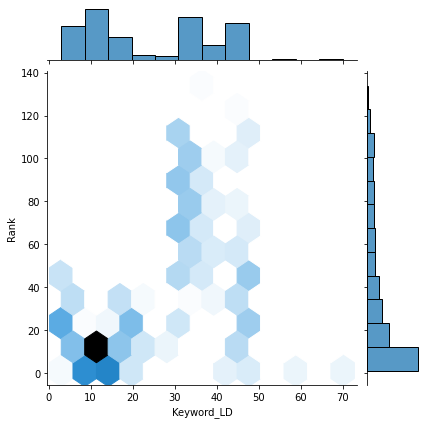

In [85]:
sns.jointplot(y = 'Rank',x = 'Keyword_LD',data = df, kind = 'hex')

Looks like browsers seem to have a good rank when the keyword occurs around <15 times in the Long Description

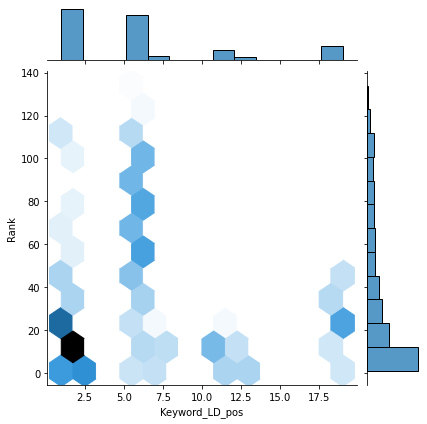

In [79]:
sns.jointplot(y = 'Rank',x = 'Keyword_LD_pos',data = df, kind = 'hex')

Looks like having the keyword be within the first few words (<5th) indicates a higher rank.